In [1]:
%matplotlib inline
from zhu import *
import imp

In [5]:
imp.reload(zhu)
from zhu import *

2


TypeError: 'AxesSubplot' object does not support indexing

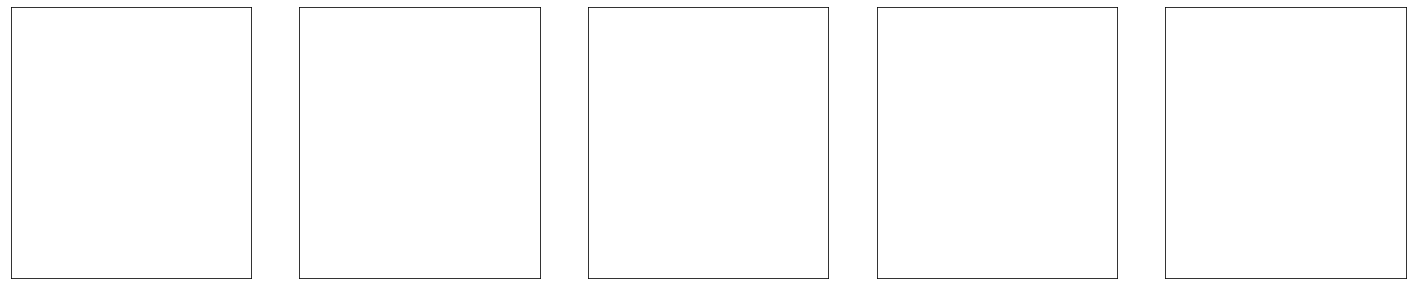

In [2]:
folder = 'to_visapp/many'
many_objects(2, 'data/'+folder,'data/'+folder+'_result', 'png')

20


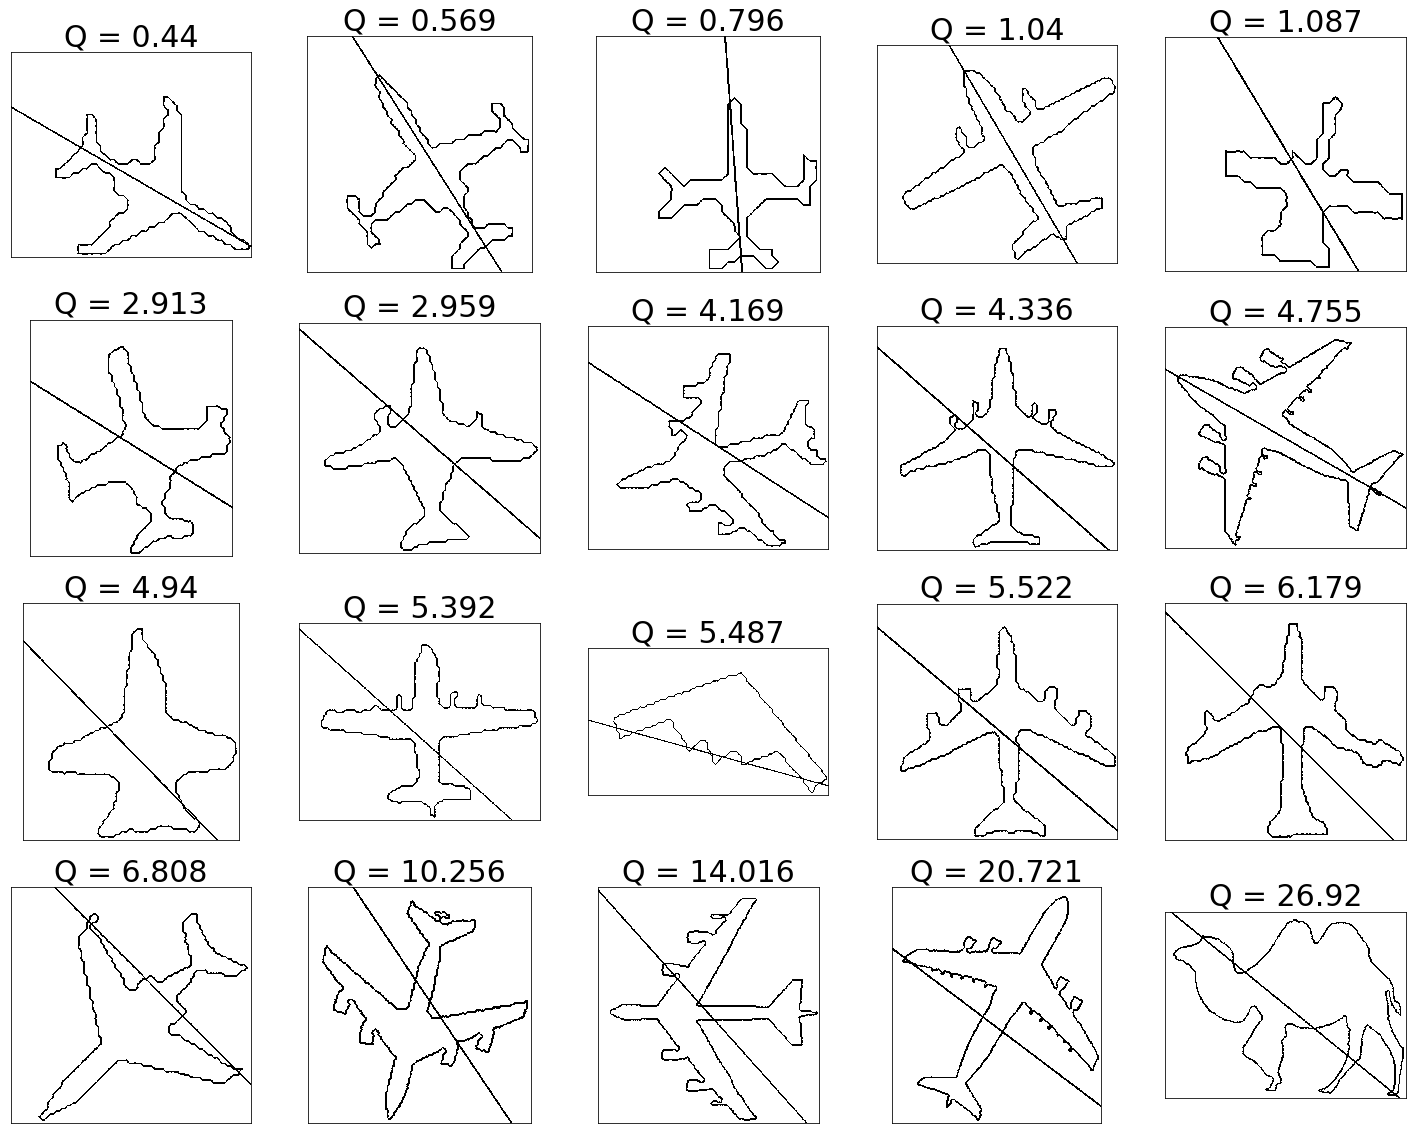

In [3]:
folder = 'to_visapp/planes'
many_objects(5, 'data/'+folder,'data/'+folder+'_result', 'png')

In [10]:
imp.reload(zhu)
from zhu import *

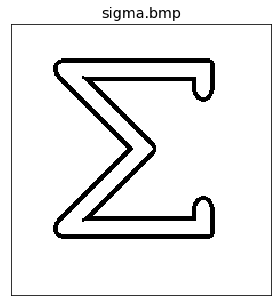

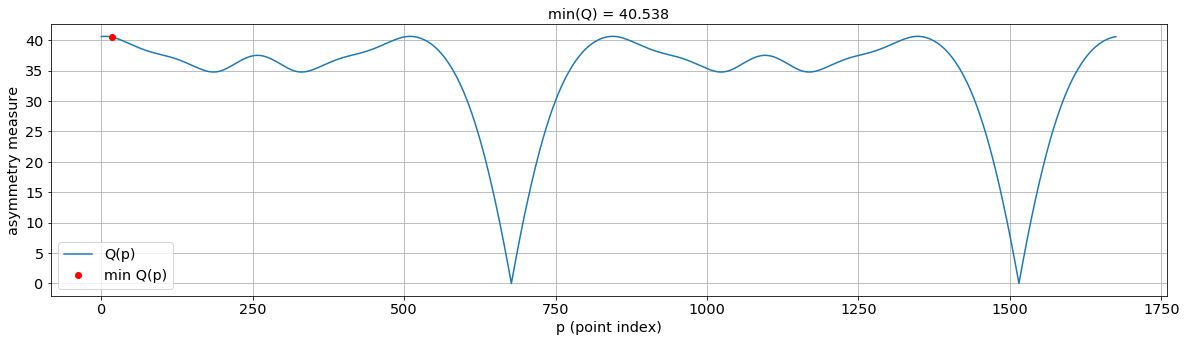

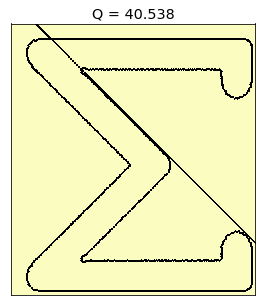

In [4]:
folder = 'to_visapp/by_one'
save_results('data/'+folder,'data/'+folder+'_result',False,'csv','png')

In [3]:
import zhu_draw
import zhu_contour
import zhu_symmetry

import numpy as np
from matplotlib import pyplot as plt

In [30]:
import imp
imp.reload(zhu_contour)
imp.reload(zhu_draw)
imp.reload(zhu_symmetry)

<module 'zhu_symmetry' from 'C:\\Users\\Александра\\PROGRAM\\Symmetry\\zhu_symmetry.py'>

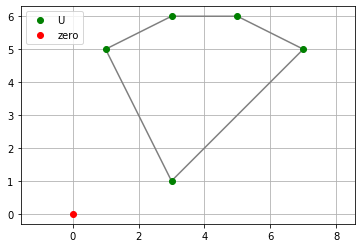

0.5547001962252291j
(0.2773500981126146+0j)
[0.        +0.5547002j  0.03466876+0.48536267j 0.06933752+0.41602515j
 0.10400629+0.34668762j 0.13867505+0.2773501j  0.17334381+0.20801257j
 0.20801257+0.13867505j 0.24268134+0.06933752j]
(0.2773500981126146+0j)
(0.8320502943378437+0.5547001962252291j)
[0.2773501 +0.j         0.34668762+0.06933752j 0.41602515+0.13867505j
 0.48536267+0.20801257j 0.5547002 +0.2773501j  0.62403772+0.34668762j
 0.69337525+0.41602515j 0.76271277+0.48536267j]
(0.8320502943378437+0.5547001962252291j)
(0.5547001962252291+0.6933752452815365j)
[0.83205029+0.5547002j  0.79738153+0.57203458j 0.76271277+0.58936896j
 0.72804401+0.60670334j 0.69337525+0.62403772j 0.65870648+0.6413721j
 0.62403772+0.65870648j 0.58936896+0.67604086j]
(0.5547001962252291+0.6933752452815365j)
(0.2773500981126146+0.6933752452815365j)
[0.5547002 +0.69337525j 0.52003143+0.69337525j 0.48536267+0.69337525j
 0.45069391+0.69337525j 0.41602515+0.69337525j 0.38135638+0.69337525j
 0.34668762+0.69337525j 

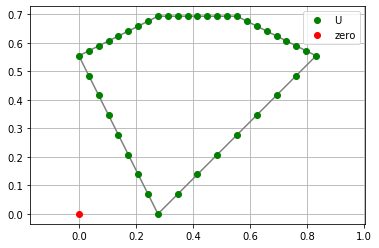

In [32]:
u = np.array([1+5j, 3+1j, 7+5j, 5+6j, 3+6j])
zhu_draw.contour(u)
u_m = zhu_contour.preprocess(u,3)
zhu_draw.contour(u_m)